#### **ПРАКТИКА**

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

In [62]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


![Столбцы таблицы.png](<attachment:Столбцы таблицы.png>)
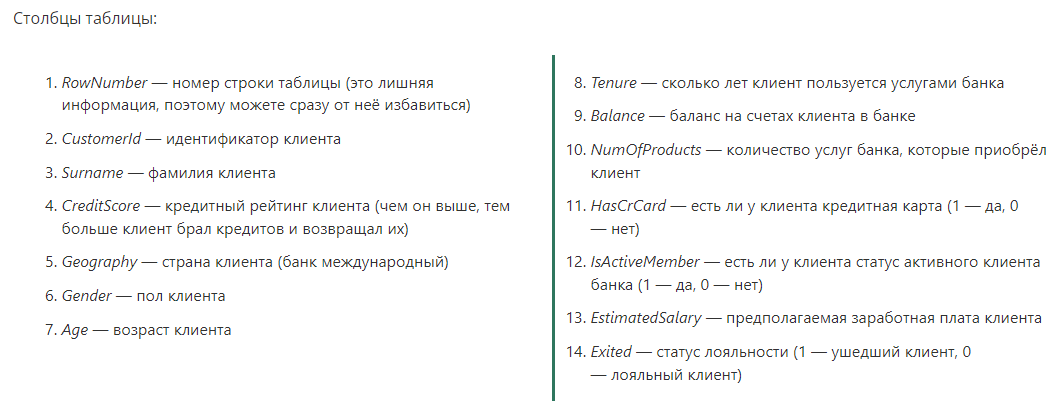

In [63]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data_1 = churn_data.copy()
churn_data_1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**ЗАДАНИЯ**

**9.1.** *Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.*

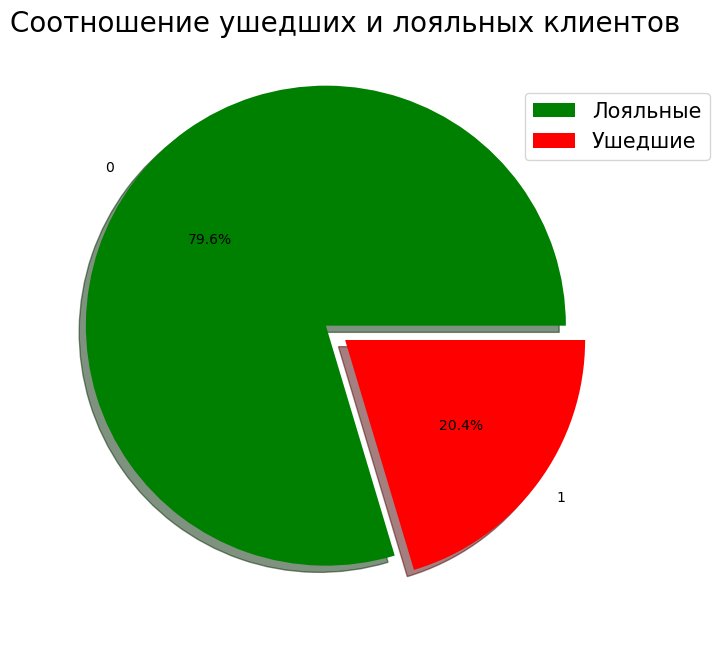

In [65]:
customers = churn_data_1['Exited'].value_counts()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=20)
axes.pie(
    customers,
    labels=customers.index,
    autopct='%.1f%%',
    explode=[0.1, 0],
    colors=['green', 'red'],
    shadow=True
);
classes = ['Лояльные', 'Ушедшие']
axes.legend(labels=classes, fontsize=15, loc=(0.8, 0.8))

**ВЫВОД:** *Обратя внимание, на данную круговую диаграмму, можно заметить соотношение ушедших и лояльных клиентов, а именно: доля лояльных клиентов составляет 79,6%, а доля ушедших - 20,4% от общего числа клиентов банка, что является достаточным большим процентом оттока клиентов банка. Причинами сложившейся ситуации, например, могут являться проблемы качества обслуживания ушедших клиентов или неудовлетворенность клиентов услугами банка и т.д.*

**9.2.** *Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.*

In [67]:
balance_distribution = churn_data_1[churn_data_1['Balance'] > 2500] #фильтруем датафрейм

#строим гистограмму
fig = px.histogram(
    data_frame=balance_distribution, #датафрейм
    x='Balance', #ось абсцисс
    height=600, #высота
    width=850, #ширина
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов', #заголовок
    nbins=30, #количество ячеек
    color_discrete_sequence=['blue']
)

#применим метод .update_layout к объекту fig
fig.update_layout(
    xaxis_title='Баланс на счету клиента, $', 
    yaxis_title='Колличество клиентов, чел.'
)

#отображаем гистограмму
fig.show()

**ВЫВОД:** *На основании данной гистограммы, можно сделать вывод, что наибольшее количество пользователей имеют баланс от 100 до 150 тыс. долларов.*

**9.3.** *Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.*

In [68]:
#строим гистограмму
fig = px.histogram(
    data_frame=churn_data_1, #датафрейм
    x='Balance', #ось абсцисс
    histfunc='count', #ось ординат
    color='Exited', #расцветка в зависимости от статуса лояльности
    color_discrete_sequence=['red', 'green'],
    height=600, #высота
    width=700, #ширина
    title='Распределение баланса клиентов: 1 - ушедшие, 0 - лояльные', #заголовок
    nbins=20 #количество ячеек
)

#добавляем метки осей
fig.update_xaxes(title_text='Баланс на счету клиента, $')
fig.update_yaxes(title_text='Количество клиентов, чел.')

#отображаем гистограмму
fig.show()

**ВЫВОД:** 

*На основании данной гистограммы, можно сделать вывод, что баланс ушедших клиентов ниже, чем у лояльных клиентов, это может быть связано с разными причинами, например:*

→ низкое качество обслуживания;

→ низкие ставки по вкладам и рост инфляции;

→ недостаточно удобные условия обслуживания;

→ недостаточно широкий выбор банковских услуг;

→ недостаточно быстрые и эффективные решения проблем клиентов.

**9.4.** *Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?*

In [69]:
#строим коробчатую диаграмму
fig = px.box(
    data_frame=churn_data_1, #датафрейм
    x='Exited', #ось абсцисс
    y='Age', #ось ординат
    height=800, #высота
    width=1100, #ширина
    points='all', #точки
    color='Exited', #расцветка в зависимости от статуса лояльности
    color_discrete_sequence=['red', 'green'],
    title='Распределение баланса клиентов: 1 - ушедшие, 0 - лояльные' #заголовок
)

#применим метод .update_layout к объекту fig
fig.update_layout(
    xaxis_title='Статус лояльности', 
    yaxis_title='Возраст клиента, лет'
)

#отображаем диаграмму
fig.show()

**ВЫВОД:** *На данной диаграмме видно, что выбросы есть как в группе ушедших, так и в группе лояльных клиентов. Однако, можно заметить, что ушедшие клиенты имеют более широкий диапазон возрастов, а также более высокие значения в медиане и верхней квартиле.*

**9.5.** *Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.*

In [70]:
#строим график
fig = px.scatter(
    data_frame=churn_data_1, #датафрейм
    x='EstimatedSalary', #ось абсцисс
    y='CreditScore', #ось ординат
    color='Exited', #расцветка в зависимости от статуса лояльности
    color_continuous_scale=['green', 'red'],
    height=700, #высота
    width=1000, #ширина
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой заработной платы', #заголовок  
)

#применим метод .update_layout к объекту fig
fig.update_layout(
    xaxis_title='Предполагаемая заработная плата клиента',
    yaxis_title='Кредитный рейтинг клиента'
)

#отображаем график
fig.show()

**ВЫВОД:** *Взаимосвязь между признаками отсутствует, так как точки на графике распределены хаотично. Также можно заметить, что кредитный рейтинг меньше 400 есть только у ушедших клиентов, это клиенты со средней или высокой предполагаемой заработной платой. Что касается лояльных клиентов, то можно сделать вывод: так как большое скопление точек на уровне высокого кредитного рейтинга расположены по всей оси абсцисс, это говорит об их высоком кредитном рейтинге, который совершенно не зависит от предполагаемой заработной платы клиента.*

**9.6.** *Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.*

**Подсказка**

*Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу **Exited** (так как 1 - это ушедшие клиенты, а 0 - лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).*

In [72]:
churn_data_1['Exited'] = churn_data_1['Exited'].astype('int')
churn_data_1['Loyal'] = 1 - churn_data_1['Exited']
grouped_by_exit = churn_data_1.groupby(['Gender'])[['Exited', 'Loyal']].sum()

#строим диаграмму
fig = px.bar(
    data_frame=grouped_by_exit, #датафрейм
    x=grouped_by_exit.index, #ось абсцисс
    y=['Exited', 'Loyal'], #ось ординат
    height=600, #высота
    width=800, #ширина
    color_discrete_sequence=['red', 'green'],
    text_auto=True,
    barmode='group'
)

#применим метод .update_layout к объекту fig
fig.update_layout(
    title='Доля ушедших клиентов в зависимости от пола', #заголовок
    xaxis_title='Пол',
    yaxis_title='Количество клиентов, чел.',
    legend=dict(
        x=0.5,
        xanchor='center',
        orientation='h',
        title='Клиенты',
        font=dict(family='Arial', size=16),
        itemsizing='constant'
    ),
)

#отображаем диаграмму
fig.show()

**ВЫВОД:** *На диаграмме видно, что женщины чаще уходят, чем мужчины, но разница не очень большая: доля ушедших клиентов среди мужчин составляет почти 9% всех клиентов банка, тогда как, среди женщин - 11.4%.*

**9.7.** *Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.*

In [74]:
churn_data_1['Exited'] = churn_data_1['Exited'].astype('int')
churn_data_1['Loyal'] = 1 - churn_data_1['Exited']
grouped_by_exit = churn_data_1.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()

#строим диаграмму
fig = px.bar(
    data_frame=grouped_by_exit, #датафрейм
    x=grouped_by_exit.index, #ось абсцисс
    y=['Exited', 'Loyal'], #ось ординат
    height=600, #высота
    width=800, #ширина
    color_discrete_sequence=['red', 'green'],
    text_auto=True,
    barmode="group"   
)

#применим метод .update_layout к объекту fig
fig.update_layout(
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг банка', #заголовок
    xaxis_title='Количество услуг банка, приобретенных клиентом, шт.',
    yaxis_title='Количество клиентов, чел.',
    legend=dict(
        x=0.5,
        xanchor="center",
        orientation='h',
        title='Клиенты',
        font=dict(family='Arial', size=16),
        itemsizing='constant'
    ),
)

#отображаем диаграмму
fig.show()

**ВЫВОД:** *С помощью взаимосвязи оттока клиентов и числа приобретенных услуг банка можно понять, как количество услуг, которыми пользуются клиенты, влияют на вероятность их ухода из банка. Данная диаграмма показывает, что клиенты, использующие большое количество услуг банка, имеют более высокую лояльность и соотвественно меньшую вероятность ухода. Можно сделать вывод, что клиенты, использующие несколько услуг банка, могут получать дополнительные "привилегии", такие как скидки, бонусы, более высокий уровень обслуживания и качество предоставляемых услуг, что скорее всего не приведет к оттоку данных клиентов.*

**9.8.** *Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?*

In [76]:
churn_data_1['Exited'] = churn_data_1['Exited'].astype('int')
churn_data_1['Loyal'] = 1 - churn_data_1['Exited']
grouped_by_exit = churn_data_1.groupby(['IsActiveMember'])[['Exited', 'Loyal']].sum()

#строим диаграмму
fig = px.bar(
    data_frame=grouped_by_exit, #датафрейм
    x=grouped_by_exit.index, #ось абсцисс
    y=['Exited', 'Loyal'], #ось ординат
    height=600, #высота
    width=800, #ширина
    color_discrete_sequence=['red', 'green'],
    text_auto=True,
    barmode="group"   
)

#применим метод .update_layout к объекту fig
fig.update_layout(
    title='Влияние статуса активного клиента на отток клиентов', #заголовок
    xaxis_title='Статус активности',
    yaxis_title='Количество клиентов, чел.',
    legend=dict(
        x=0.5,
        xanchor="center",
        orientation='h',
        title='Клиенты',
        font=dict(family='Arial', size=16),
        itemsizing='constant'
    ),
)

#отображаем диаграмму
fig.show()

**ВЫВОД:** 

*На полученной диаграмме можно заметить, что доля ушедших клиентов банка среди неактивных клиентов выше, чем среди активных. Это говорит о том, что статус активного клиента может существенно влиять на вероятность оттока клиента. Чтобы уменьшить отток клиентов среди неактивных, банк может принять следующие меры:*

→ *необходимо привлекать неактивных клиентов в банковские услуги и предоставлять им персонализированные предложения;*

→ *повышать удобство и доступность банковских услуг для неактивных клиентов, например, с помощью мобильных приложений;*

→ *улучшать обслуживание и качество предоставляемых услуг для всех клиентов, в том числе для неактивных, чтобы повысить их удовлетворенность и лояльность.*

**9.9.** *В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.*

In [77]:
#группируем данные по странам и вычисляем долю ушедших клиентов
countries = churn_data_1.groupby(['Geography'])['Exited'].mean().reset_index()

#строим тепловую картограмму
fig = px.choropleth(
    data_frame=countries, #датафрейм
    locations='Geography', #столбец с локациями
    locationmode='country names', #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    color_continuous_scale=['green', 'red'], #цвета
    range_color=[0, 0.3], #диапазон цвета
    hover_name='Geography',
    title='Доля ушедших клиентов по странам', #заголовок
    height=500, #высота
    width=800, #ширина
)

#отображаем график
fig.show()

**ВЫВОД:** *На полученной тепловой картограмме можно заметить, что доля ушедших клиентов в Германии выше, чем в Испании и во Франции. Возможно, это связано с разными условиями банковского сектора в этих странах, а также с разным уровнем экономической и политической стабильности.*

**9.10.** *Переведите числовой признак **CreditScore** в категориальный. Для этого воспользуйтесь функцией **get_credit_score_cat()**, которая приведена ниже. Примените её к столбцу **CreditScore** и создайте новый признак **CreditScoreCat** - категории кредитного рейтинга.*

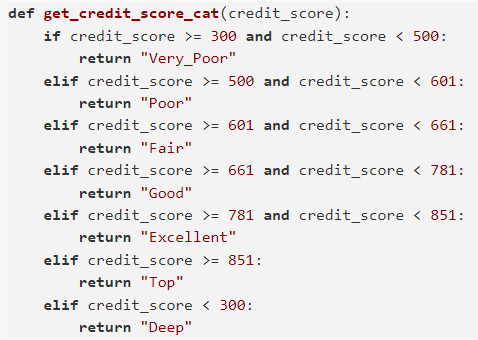

*Постройте сводную таблицу, строками которой являются категории кредитного рейтинга **(CreditScoreCat)**, а столбцами - количество лет, в течение которых клиент пользуется услугами банка **(Tenure)**. В ячейках сводной таблицы должно находиться среднее по признаку оттока **(Exited)** - доля ушедших пользователей.*

In [78]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data_1['CreditScoreCat'] = churn_data_1['CreditScore'].apply(get_credit_score_cat)

pivot_table = churn_data_1.pivot_table(
                index='CreditScoreCat',
                columns='Tenure',
                values='Exited',
                aggfunc='mean')

display(pivot_table)


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


*На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.*

In [80]:
#строим тепловую карту
fig = px.imshow(pivot_table,
                labels=dict(x='Колличество лет, года', y='Категории кредитного рейтинга', color='CreditScoreCat'),
                x=pivot_table.columns.tolist(),
                y=pivot_table.index.tolist(),
                color_continuous_scale=['green', 'red'], #цвета
                height=600, #высота
                width=1000, #ширина
                text_auto=True,
                title='Зависимость оттока клиентов от кредитного рейтинга и количества лет использвания услуг банка')

#отображаем тепловую карту
fig.show()

**ВЫВОД:** *На тепловой карте можно найти категории клиентов, которые уходят чаще всего, а именно по тем ячейкам, в которых среднее значение оттока будет наибольшее. В нашем случае, такая категория - это клиенты с кредитным рейтингом **Very_Poor**, пользующиеся услугами банка в течение 1 года.*

**ИТОГОВЫЙ ВЫВОД:**

*Итак, были выяснены основные причины оттока клиентов и установлено, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. На основе анализа банку будут переданы исследования для разработки кампании лояльности по удержанию клиентов и дальнейшего построения модели машинного обучения, которая будет прогнозировать уход клиента.*